# Portfolio Backtesting


## 1. Libraries and Prerequisites (Loading Main Data)

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
close_df = pd.read_csv('data/pse_close_combined_revised.csv', parse_dates=['time'])
close_df.set_index('time', inplace=True)

In [24]:
# Listing all portfolios formed

# Minimum standard deviation
portfolio_0 = ['TEL','ACEN','LTG','BLOOM','DMC']

# Maximumn Sharpe Ratio 
portfolio_1 = ['TEL','SCC','SMC','GTCAP','JFC']

# Maximum Annual Returns
portfolio_2 = ['GLO','SCC','SM','GTCAP','MER']

# Random stock from each cluster
portfolio_3 = ['GLO','ACEN','AREIT','MONDE','DMC']

In [25]:
# Portfolio weights

p0_mvmshr = {'TEL': 0.024420646965414364,
'ACEN': 0.0,
'LTG': 0.07692741807990153,
'BLOOM': 0.0,
'DMC': 0.8986519349546842}

p0_mvmstd = {'TEL': 0.15363577024356662,
'ACEN': 0.09175845693315109,
'LTG': 0.46345893081117534,
'BLOOM': 0.10300868494431552,
'DMC': 0.18813815706779144}

p1_mvmshr = {'TEL': 0.0,
'SCC': 0.870608529309121,
'SMC': 0.0,
'GTCAP': 0.0,
'JFC': 0.12939147069087883}

p1_mvmstd = {'TEL': 0.161999083912671,
'SCC': 0.1507690501252748,
'SMC': 0.3696186900048963,
'GTCAP': 0.12249341111118979,
'JFC': 0.1951197648459681}

p2_mvmshr = {'GLO': 0.01294438974366919,
'SCC': 0.6285724423034087,
'SM': 0.0,
'GTCAP': 0.0,
'MER': 0.358483167952922}

p2_mvmstd = {'GLO': 0.17076475626463153,
'SCC': 0.1936179998507373,
'SM': 0.2136082421424044,
'GTCAP': 0.15198545541454028,
'MER': 0.27002354632768644}

p3_mvmshr = {'GLO': 0.17786080588205078,
'ACEN': 0.06702553825476154,
'AREIT': 0.40127945775208523,
'MONDE': 0.10752033550788027,
'DMC': 0.24631386260322213}

p3_mvmstd = {'GLO': 0.17786080588205078,
'ACEN': 0.06702553825476154,
'AREIT': 0.40127945775208523,
'MONDE': 0.10752033550788027,
'DMC': 0.24631386260322213}

## 2. Loading PSEi Data

In [29]:
psei_df = pd.read_csv('raw_data/benchmark/PSE_DLY_PSEI_1D.csv',parse_dates=['time'])
psei_df.set_index('time', inplace=True)

psei_df = psei_df[
    (psei_df.index >= '2021-06-01') & 
    (psei_df.index <= '2024-12-31')
]

psei_df = psei_df['close']
psei_df

time
2021-06-01    6627.4302
2021-06-02    6841.6899
2021-06-03    6791.8701
2021-06-04    6796.3398
2021-06-07    6763.9199
                ...    
2024-12-19    6395.6000
2024-12-20    6406.3800
2024-12-23    6534.9100
2024-12-26    6539.0200
2024-12-27    6528.7900
Name: close, Length: 880, dtype: float64

In [30]:
psei_log_ret = np.log(psei_df / psei_df.shift(1))
psei_log_mean = psei_log_ret.mean() * 252

psei_log_mean = float(psei_log_mean)
psei_log_mean

-0.004299051124052239

## 3. Portfolio 0

### Maximize Sharpe Ratio

In [61]:
df = close_df.copy()
df = df[portfolio_0]

In [62]:
for stock, weight in p0_mvmshr.items():
    df[stock] = df[stock] * weight

# Sum across all weighted columns to get portfolio price
df['portfolio'] = df[list(p0_mvmshr.keys())].sum(axis=1)
df = df.reset_index()
df

,time,TEL,ACEN,LTG,BLOOM,DMC,portfolio
0,2021-06-01,24.025653,0.0,0.649056,0.0,3.133930,27.808638
1,2021-06-02,24.191856,0.0,0.637053,0.0,3.150482,27.979392
2,2021-06-03,24.339593,0.0,0.637976,0.0,3.244279,28.221849
3,2021-06-04,24.524263,0.0,0.637053,0.0,3.271867,28.433183
4,2021-06-07,24.431928,0.0,0.637053,0.0,3.216692,28.285673
...,...,...,...,...,...,...,...
875,2024-12-19,29.970794,0.0,0.773058,0.0,8.904170,39.648022
876,2024-12-20,29.546011,0.0,0.786568,0.0,8.768229,39.100808
877,2024-12-23,29.616808,0.0,0.788069,0.0,8.938156,39.343033
878,2024-12-26,30.607968,0.0,0.788069,0.0,9.125075,40.521113


In [63]:
# Merge PSEI to stock_df
merged_df = df[['time', 'portfolio']].merge(psei_df, on='time')
merged_df = merged_df.rename(columns={'close': 'psei'})

# Normalize to 100 at the start
merged_df['portfolio_norm'] = (merged_df['portfolio'] / merged_df['portfolio'].iloc[0]) * 100
merged_df['psei_norm'] = (merged_df['psei'] / merged_df['psei'].iloc[0]) * 100

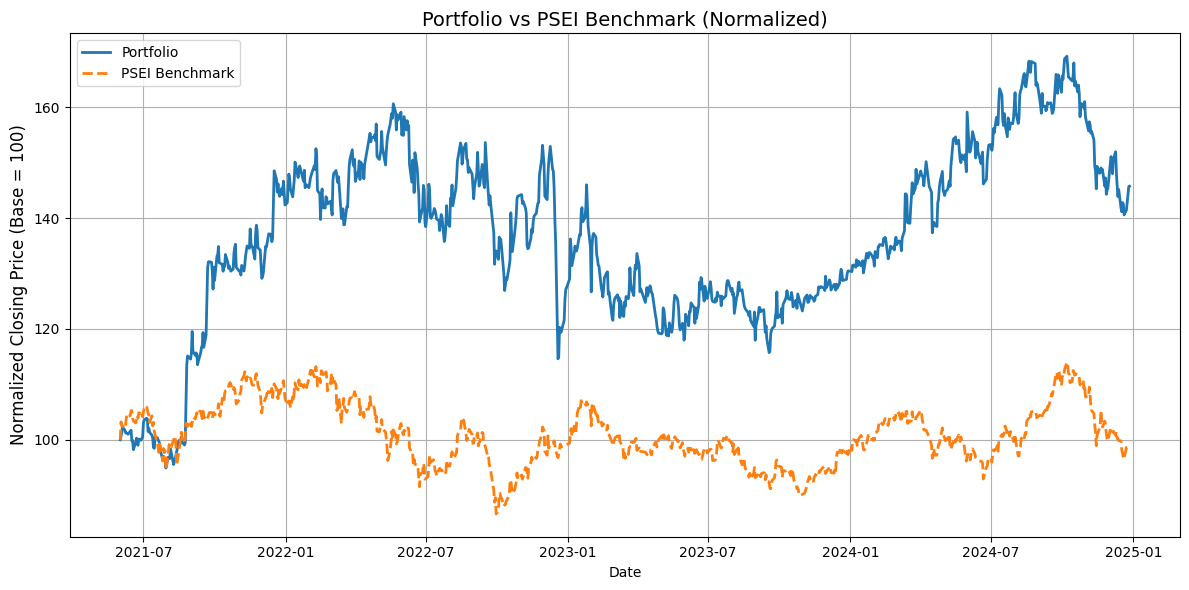

In [64]:
plt.figure(figsize=(12,6))
plt.plot(merged_df['time'], merged_df['portfolio_norm'], label='Portfolio', linewidth=2)
plt.plot(merged_df['time'], merged_df['psei_norm'], label='PSEI Benchmark', linewidth=2, linestyle='--')
plt.title('Portfolio vs PSEI Benchmark (Normalized)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Normalized Closing Price (Base = 100)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [96]:
# NOTE: These values came from Portfolio Optimization Notebook

print(f"Portfolio 0 with Maximized Sharpe Ratio outperformed the PSE Index by {np.round((0.28321975451126474 - psei_log_mean)*100, 2)}%")

Portfolio 0 with Maximized Sharpe Ratio outperformed the PSE Index by 28.75%


### Minimize Standard Deviation

In [66]:
df = close_df.copy()
df = df[portfolio_0]

In [67]:
for stock, weight in p0_mvmstd.items():
    df[stock] = df[stock] * weight

# Sum across all weighted columns to get portfolio price
df['portfolio'] = df[list(p0_mvmstd.keys())].sum(axis=1)
df = df.reset_index()
df

,time,TEL,ACEN,LTG,BLOOM,DMC,portfolio
0,2021-06-01,151.150773,0.653950,3.910317,0.663215,0.656107,157.034362
1,2021-06-02,152.196397,0.663791,3.838007,0.709439,0.659572,158.067206
2,2021-06-03,153.125840,0.674526,3.843570,0.716473,0.679209,159.039618
3,2021-06-04,154.287645,0.695996,3.838007,0.718482,0.684985,160.225116
4,2021-06-07,153.706743,0.695996,3.838007,0.708434,0.673434,159.622614
...,...,...,...,...,...,...,...
875,2024-12-19,188.552991,0.330330,4.657386,0.458221,1.864141,195.863070
876,2024-12-20,185.880587,0.346847,4.738777,0.454201,1.835681,193.256093
877,2024-12-23,186.325987,0.367034,4.747821,0.451187,1.871256,193.763285
878,2024-12-26,192.561598,0.362446,4.747821,0.452192,1.910389,200.034445


In [68]:
# Merge PSEI to stock_df
merged_df = df[['time', 'portfolio']].merge(psei_df, on='time')
merged_df = merged_df.rename(columns={'close': 'psei'})

# Normalize to 100 at the start
merged_df['portfolio_norm'] = (merged_df['portfolio'] / merged_df['portfolio'].iloc[0]) * 100
merged_df['psei_norm'] = (merged_df['psei'] / merged_df['psei'].iloc[0]) * 100

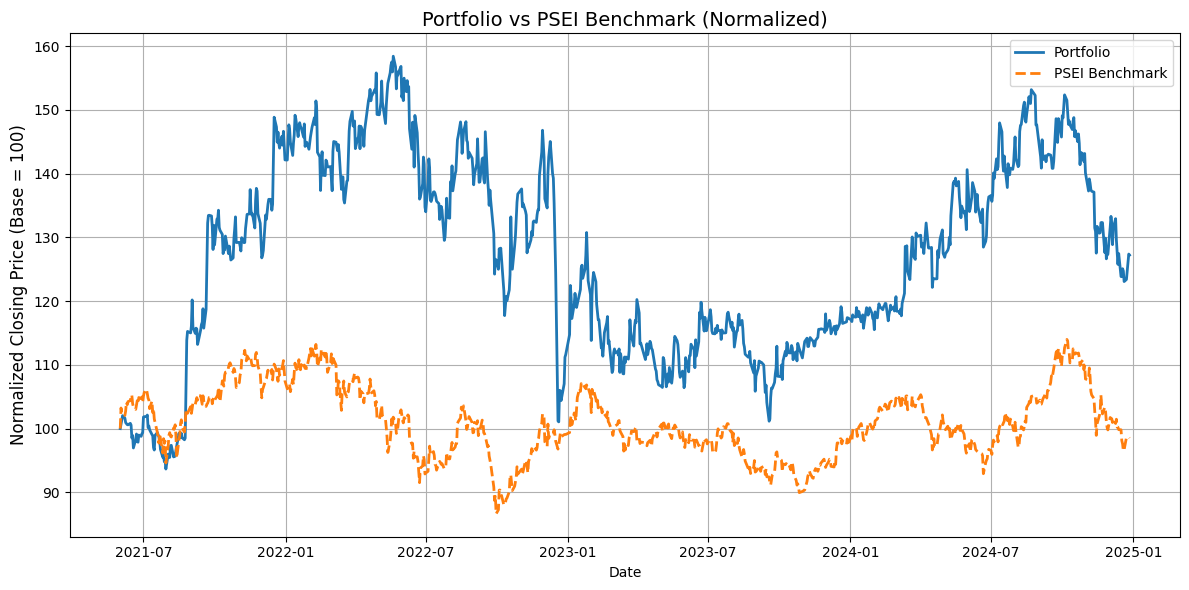

In [69]:
plt.figure(figsize=(12,6))
plt.plot(merged_df['time'], merged_df['portfolio_norm'], label='Portfolio', linewidth=2)
plt.plot(merged_df['time'], merged_df['psei_norm'], label='PSEI Benchmark', linewidth=2, linestyle='--')
plt.title('Portfolio vs PSEI Benchmark (Normalized)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Normalized Closing Price (Base = 100)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [97]:
# NOTE: These values came from Portfolio Optimization Notebook

print(f"Portfolio 0 with Minimized Standard Deviation outperformed the PSE Index by {np.round((0.06844391263074498 - psei_log_mean)*100, 2)}%")

Portfolio 0 with Minimized Standard Deviation outperformed the PSE Index by 7.27%


## 4. Portfolio 1

### Maximize Sharpe Ratio

In [74]:
df = close_df.copy()
df = df[portfolio_1]

In [75]:
for stock, weight in p1_mvmshr.items():
    df[stock] = df[stock] * weight

# Sum across all weighted columns to get portfolio price
df['portfolio'] = df[list(p1_mvmshr.keys())].sum(axis=1)
df = df.reset_index()
df

,time,TEL,SCC,SMC,GTCAP,JFC,portfolio
0,2021-06-01,0.0,6.000977,0.0,0.0,23.395351,29.396329
1,2021-06-02,0.0,6.135730,0.0,0.0,24.164854,30.300584
2,2021-06-03,0.0,6.306416,0.0,0.0,24.053152,30.359568
3,2021-06-04,0.0,6.207598,0.0,0.0,24.077974,30.285572
4,2021-06-07,0.0,6.288449,0.0,0.0,24.326201,30.614650
...,...,...,...,...,...,...,...
875,2024-12-19,0.0,27.019408,0.0,0.0,32.927541,59.946949
876,2024-12-20,0.0,27.225035,0.0,0.0,32.978991,60.204026
877,2024-12-23,0.0,27.142784,0.0,0.0,34.496745,61.639529
878,2024-12-26,0.0,28.294296,0.0,0.0,33.802179,62.096475


In [76]:
# Merge PSEI to stock_df
merged_df = df[['time', 'portfolio']].merge(psei_df, on='time')
merged_df = merged_df.rename(columns={'close': 'psei'})

# Normalize to 100 at the start
merged_df['portfolio_norm'] = (merged_df['portfolio'] / merged_df['portfolio'].iloc[0]) * 100
merged_df['psei_norm'] = (merged_df['psei'] / merged_df['psei'].iloc[0]) * 100

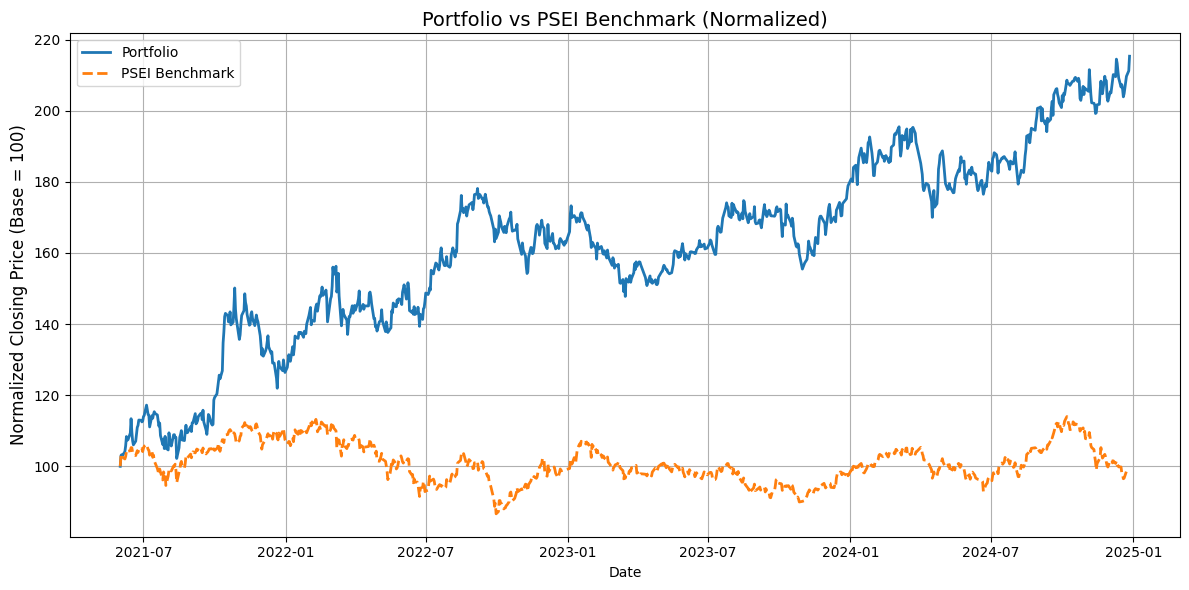

In [77]:
plt.figure(figsize=(12,6))
plt.plot(merged_df['time'], merged_df['portfolio_norm'], label='Portfolio', linewidth=2)
plt.plot(merged_df['time'], merged_df['psei_norm'], label='PSEI Benchmark', linewidth=2, linestyle='--')
plt.title('Portfolio vs PSEI Benchmark (Normalized)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Normalized Closing Price (Base = 100)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [98]:
# NOTE: These values came from Portfolio Optimization Notebook

print(f"Portfolio 1 with Maximized Sharpe Ratio outperformed the PSE Index by {np.round((0.4051725354173016 - psei_log_mean)*100, 2)}%")

Portfolio 1 with Maximized Sharpe Ratio outperformed the PSE Index by 40.95%


### Minimize Standard Deviation

In [81]:
df = close_df.copy()
df = df[portfolio_1]

In [82]:
for stock, weight in p1_mvmstd.items():
    df[stock] = df[stock] * weight

# Sum across all weighted columns to get portfolio price
df['portfolio'] = df[list(p1_mvmstd.keys())].sum(axis=1)
df = df.reset_index()
df

,time,TEL,SCC,SMC,GTCAP,JFC,portfolio
0,2021-06-01,159.378813,1.039229,40.610834,69.513405,35.279725,305.822005
1,2021-06-02,160.481357,1.062565,41.975022,72.829206,36.440119,312.788269
2,2021-06-03,161.461396,1.092124,42.149918,70.460777,36.271674,311.435889
3,2021-06-04,162.686444,1.075011,41.450334,68.743665,36.309107,310.264561
4,2021-06-07,162.073920,1.089012,41.100542,69.868669,36.683427,310.815571
...,...,...,...,...,...,...,...
875,2024-12-19,198.817058,4.679130,32.036874,74.336072,49.654078,359.523211
876,2024-12-20,195.999178,4.714740,32.036874,73.851008,49.731662,356.333462
877,2024-12-23,196.468825,4.700496,32.128512,77.852786,52.020405,363.171024
878,2024-12-26,203.043877,4.899911,30.057479,80.035575,50.973014,369.009856


In [83]:
# Merge PSEI to stock_df
merged_df = df[['time', 'portfolio']].merge(psei_df, on='time')
merged_df = merged_df.rename(columns={'close': 'psei'})

# Normalize to 100 at the start
merged_df['portfolio_norm'] = (merged_df['portfolio'] / merged_df['portfolio'].iloc[0]) * 100
merged_df['psei_norm'] = (merged_df['psei'] / merged_df['psei'].iloc[0]) * 100

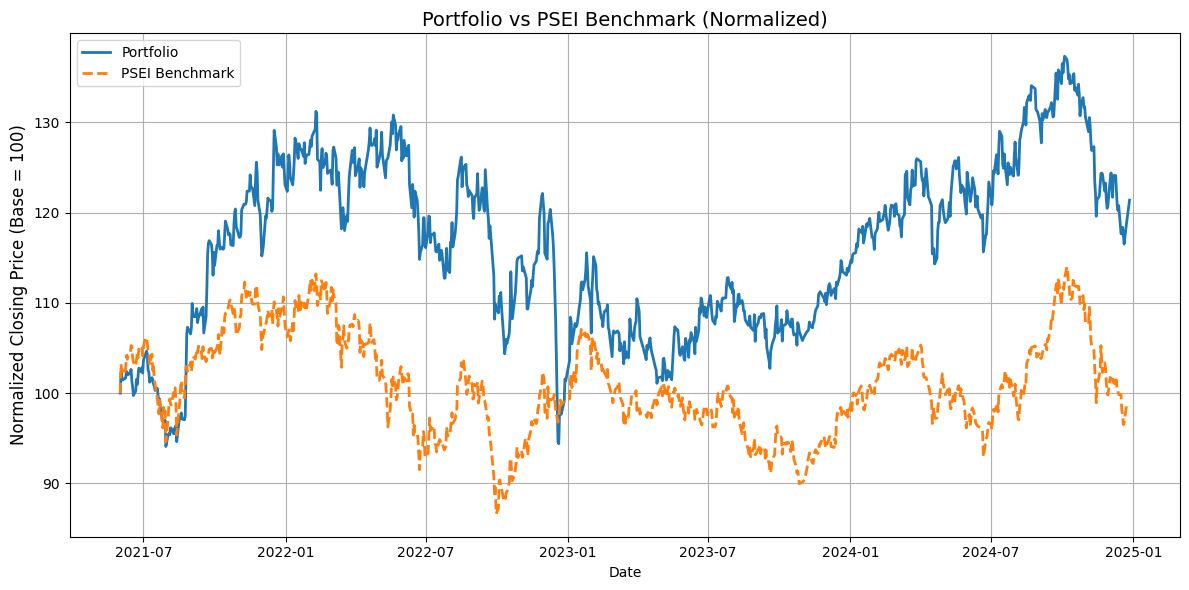

In [84]:
plt.figure(figsize=(12,6))
plt.plot(merged_df['time'], merged_df['portfolio_norm'], label='Portfolio', linewidth=2)
plt.plot(merged_df['time'], merged_df['psei_norm'], label='PSEI Benchmark', linewidth=2, linestyle='--')
plt.title('Portfolio vs PSEI Benchmark (Normalized)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Normalized Closing Price (Base = 100)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [99]:
# NOTE: These values came from Portfolio Optimization Notebook

print(f"Portfolio 1 with Minimized Standard Deviation outperformed the PSE Index by {np.round((0.07871856067966398 - psei_log_mean)*100, 2)}%")

Portfolio 1 with Minimized Standard Deviation outperformed the PSE Index by 8.3%


## 5. Portfolio 2

### Maximize Sharpe Ratio

In [91]:
df = close_df.copy()
df = df[portfolio_2]

In [92]:
for stock, weight in p2_mvmshr.items():
    df[stock] = df[stock] * weight

# Sum across all weighted columns to get portfolio price
df['portfolio'] = df[list(p2_mvmshr.keys())].sum(axis=1)
df = df.reset_index()
df

,time,GLO,SCC,SM,GTCAP,MER,portfolio
0,2021-06-01,19.129712,4.332658,0.0,0.0,81.473709,104.936080
1,2021-06-02,19.213477,4.429948,0.0,0.0,82.928597,106.572022
2,2021-06-03,18.962183,4.553183,0.0,0.0,82.637619,106.152985
3,2021-06-04,19.265830,4.481836,0.0,0.0,82.055664,105.803330
4,2021-06-07,19.265830,4.540211,0.0,0.0,80.018821,103.824862
...,...,...,...,...,...,...,...
875,2024-12-19,25.857763,19.507798,0.0,0.0,161.994012,207.359573
876,2024-12-20,26.261790,19.656259,0.0,0.0,157.600718,203.518767
877,2024-12-23,26.463804,19.596875,0.0,0.0,169.455639,215.516318
878,2024-12-26,26.514308,20.428257,0.0,0.0,167.363594,214.306159


In [93]:
# Merge PSEI to stock_df
merged_df = df[['time', 'portfolio']].merge(psei_df, on='time')
merged_df = merged_df.rename(columns={'close': 'psei'})

# Normalize to 100 at the start
merged_df['portfolio_norm'] = (merged_df['portfolio'] / merged_df['portfolio'].iloc[0]) * 100
merged_df['psei_norm'] = (merged_df['psei'] / merged_df['psei'].iloc[0]) * 100

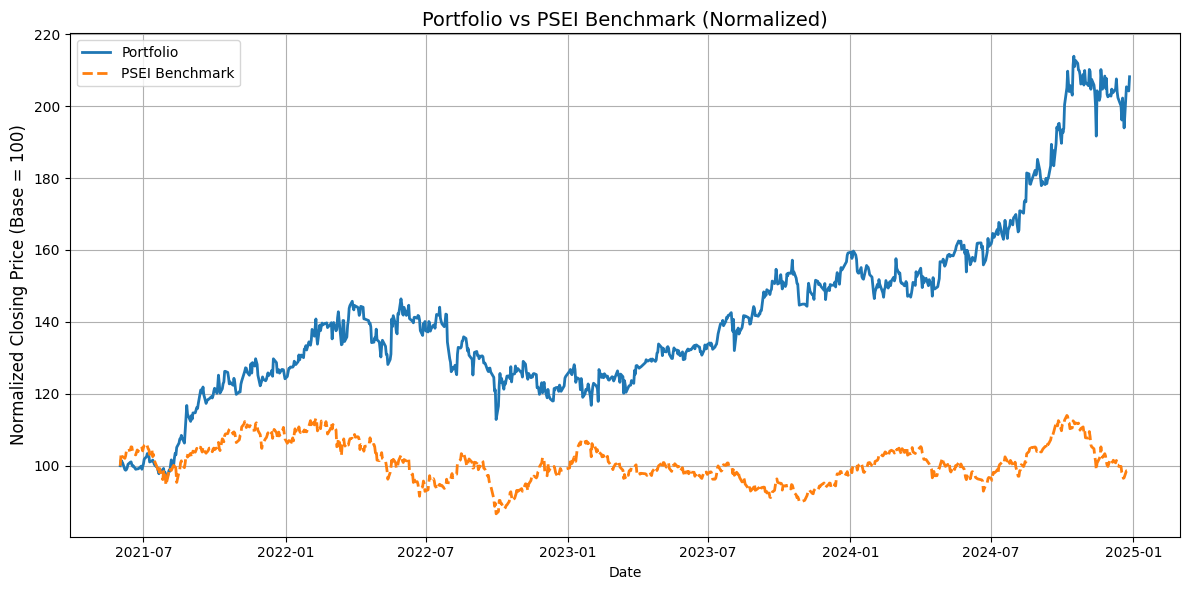

In [94]:
plt.figure(figsize=(12,6))
plt.plot(merged_df['time'], merged_df['portfolio_norm'], label='Portfolio', linewidth=2)
plt.plot(merged_df['time'], merged_df['psei_norm'], label='PSEI Benchmark', linewidth=2, linestyle='--')
plt.title('Portfolio vs PSEI Benchmark (Normalized)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Normalized Closing Price (Base = 100)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [95]:
# NOTE: These values came from Portfolio Optimization Notebook

print(f"Portfolio 2 with Maximized Ratio outperformed the PSE Index by {np.round((0.35909229989943897 - psei_log_mean)*100, 2)}%")

Portfolio 2 with Maximized Ratio outperformed the PSE Index by 36.34%


### Minimize Standard Deviation

In [104]:
df = close_df.copy()
df = df[portfolio_2]

In [105]:
for stock, weight in p2_mvmstd.items():
    df[stock] = df[stock] * weight

# Sum across all weighted columns to get portfolio price
df['portfolio'] = df[list(p2_mvmstd.keys())].sum(axis=1)
df = df.reset_index()
df

,time,GLO,SCC,SM,GTCAP,MER,portfolio
0,2021-06-01,252.362663,1.334581,197.087417,86.249754,61.369185,598.403600
1,2021-06-02,253.467700,1.364549,205.192522,90.363882,62.465063,612.853715
2,2021-06-03,250.152591,1.402508,204.782137,87.425219,62.245888,606.008342
3,2021-06-04,254.158347,1.380532,205.192522,85.294688,61.807536,607.833626
4,2021-06-07,254.158347,1.398513,203.140597,86.690553,60.273307,605.661316
...,...,...,...,...,...,...,...
875,2024-12-19,341.120335,6.008951,184.528728,92.233546,122.020227,745.911787
876,2024-12-20,346.450340,6.054681,185.791182,91.631696,118.711026,748.638926
877,2024-12-23,349.115343,6.036389,189.368136,96.596960,127.640617,768.757445
878,2024-12-26,349.781594,6.292478,185.580773,99.305286,126.064806,767.024938


In [106]:
# Merge PSEI to stock_df
merged_df = df[['time', 'portfolio']].merge(psei_df, on='time')
merged_df = merged_df.rename(columns={'close': 'psei'})

# Normalize to 100 at the start
merged_df['portfolio_norm'] = (merged_df['portfolio'] / merged_df['portfolio'].iloc[0]) * 100
merged_df['psei_norm'] = (merged_df['psei'] / merged_df['psei'].iloc[0]) * 100

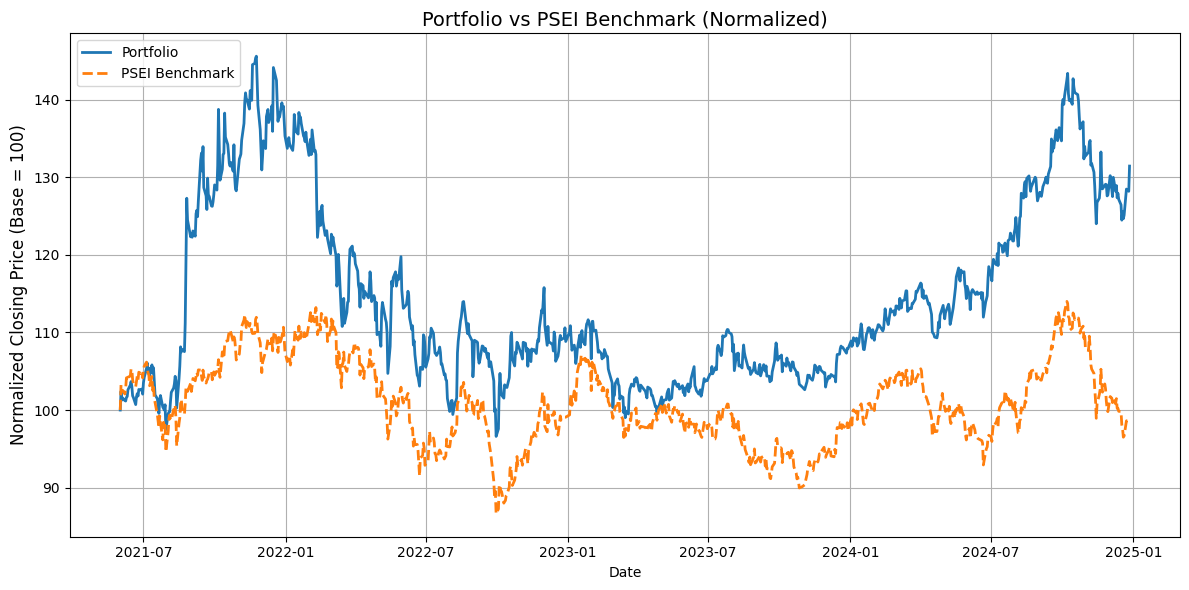

In [107]:
plt.figure(figsize=(12,6))
plt.plot(merged_df['time'], merged_df['portfolio_norm'], label='Portfolio', linewidth=2)
plt.plot(merged_df['time'], merged_df['psei_norm'], label='PSEI Benchmark', linewidth=2, linestyle='--')
plt.title('Portfolio vs PSEI Benchmark (Normalized)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Normalized Closing Price (Base = 100)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [108]:
# NOTE: These values came from Portfolio Optimization Notebook

print(f"Portfolio 2 with Minimized Standard Deviation outperformed the PSE Index by {np.round((0.16528399930830806 - psei_log_mean)*100, 2)}%")

Portfolio 2 with Minimized Standard Deviation outperformed the PSE Index by 16.96%


## 6. Portfolio 3

### Maximize Sharpe Ratio

In [121]:
df = close_df.copy()
df = df[portfolio_3]

In [122]:
for stock, weight in p3_mvmshr.items():
    df[stock] = df[stock] * weight

# Sum across all weighted columns to get portfolio price
df['portfolio'] = df[list(p3_mvmshr.keys())].sum(axis=1)
df = df.reset_index()
df

,time,GLO,ACEN,AREIT,MONDE,DMC,portfolio
0,2021-06-01,262.849476,0.477682,11.587722,1.349259,0.858987,277.123126
1,2021-06-02,264.000432,0.484870,11.699603,1.349259,0.863524,278.397688
2,2021-06-03,260.547565,0.492712,11.587722,1.311223,0.889233,274.828455
3,2021-06-04,264.719779,0.508395,11.651655,1.341251,0.896795,279.117874
4,2021-06-07,264.719779,0.508395,11.699603,1.347257,0.881672,279.156705
...,...,...,...,...,...,...,...
875,2024-12-19,355.295431,0.241292,14.787483,0.745207,2.440567,373.509980
876,2024-12-20,360.846922,0.253357,14.688637,0.816780,2.403307,379.009002
877,2024-12-23,363.622668,0.268102,14.866561,0.860987,2.449882,382.068200
878,2024-12-26,364.316604,0.264751,15.004946,0.864145,2.501116,382.951562


In [123]:
# Merge PSEI to stock_df
merged_df = df[['time', 'portfolio']].merge(psei_df, on='time')
merged_df = merged_df.rename(columns={'close': 'psei'})

# Normalize to 100 at the start
merged_df['portfolio_norm'] = (merged_df['portfolio'] / merged_df['portfolio'].iloc[0]) * 100
merged_df['psei_norm'] = (merged_df['psei'] / merged_df['psei'].iloc[0]) * 100

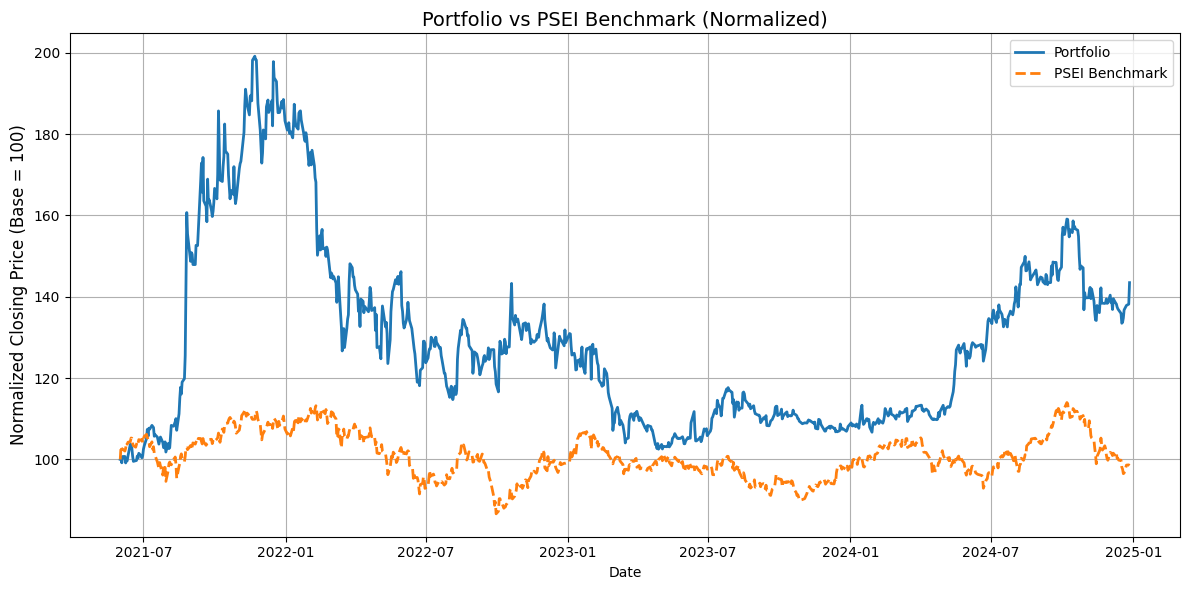

In [124]:
plt.figure(figsize=(12,6))
plt.plot(merged_df['time'], merged_df['portfolio_norm'], label='Portfolio', linewidth=2)
plt.plot(merged_df['time'], merged_df['psei_norm'], label='PSEI Benchmark', linewidth=2, linestyle='--')
plt.title('Portfolio vs PSEI Benchmark (Normalized)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Normalized Closing Price (Base = 100)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [131]:
# NOTE: These values came from Portfolio Optimization Notebook

print(f"Portfolio 3 with Maximized Ratio outperformed the PSE Index by {np.round((0.2534400833475798 - psei_log_mean)*100, 2)}%")

Portfolio 3 with Maximized Ratio outperformed the PSE Index by 25.77%


### Minimize Standard Deviation

In [126]:
df = close_df.copy()
df = df[portfolio_3]

In [127]:
for stock, weight in p3_mvmstd.items():
    df[stock] = df[stock] * weight

# Sum across all weighted columns to get portfolio price
df['portfolio'] = df[list(p3_mvmstd.keys())].sum(axis=1)
df = df.reset_index()
df

,time,GLO,ACEN,AREIT,MONDE,DMC,portfolio
0,2021-06-01,262.849476,0.477682,11.587722,1.349259,0.858987,277.123126
1,2021-06-02,264.000432,0.484870,11.699603,1.349259,0.863524,278.397688
2,2021-06-03,260.547565,0.492712,11.587722,1.311223,0.889233,274.828455
3,2021-06-04,264.719779,0.508395,11.651655,1.341251,0.896795,279.117874
4,2021-06-07,264.719779,0.508395,11.699603,1.347257,0.881672,279.156705
...,...,...,...,...,...,...,...
875,2024-12-19,355.295431,0.241292,14.787483,0.745207,2.440567,373.509980
876,2024-12-20,360.846922,0.253357,14.688637,0.816780,2.403307,379.009002
877,2024-12-23,363.622668,0.268102,14.866561,0.860987,2.449882,382.068200
878,2024-12-26,364.316604,0.264751,15.004946,0.864145,2.501116,382.951562


In [128]:
# Merge PSEI to stock_df
merged_df = df[['time', 'portfolio']].merge(psei_df, on='time')
merged_df = merged_df.rename(columns={'close': 'psei'})

# Normalize to 100 at the start
merged_df['portfolio_norm'] = (merged_df['portfolio'] / merged_df['portfolio'].iloc[0]) * 100
merged_df['psei_norm'] = (merged_df['psei'] / merged_df['psei'].iloc[0]) * 100

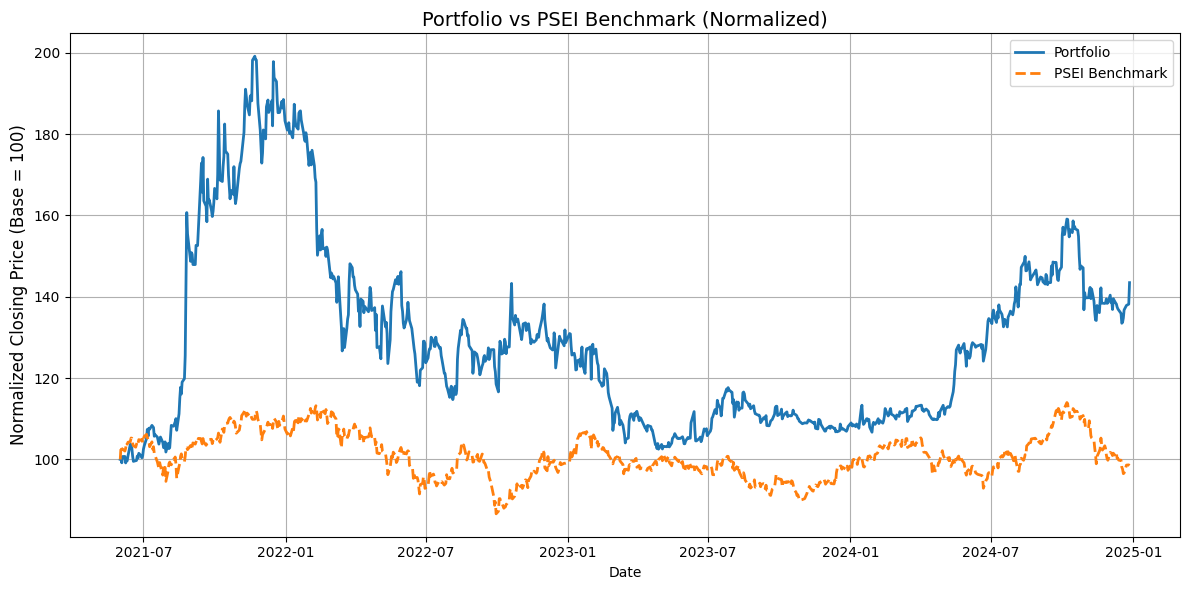

In [129]:
plt.figure(figsize=(12,6))
plt.plot(merged_df['time'], merged_df['portfolio_norm'], label='Portfolio', linewidth=2)
plt.plot(merged_df['time'], merged_df['psei_norm'], label='PSEI Benchmark', linewidth=2, linestyle='--')
plt.title('Portfolio vs PSEI Benchmark (Normalized)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Normalized Closing Price (Base = 100)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [132]:
# NOTE: These values came from Portfolio Optimization Notebook

print(f"Portfolio 3 with Minimized Standard Deviation outperformed the PSE Index by {np.round((0.10096738794530538 - psei_log_mean)*100, 2)}%")

Portfolio 3 with Minimized Standard Deviation outperformed the PSE Index by 10.53%
